In [280]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [281]:
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
iris_y = pd.get_dummies(iris_y).values # Convert categorical variable into dummy/indicator variables
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)
print(iris_X.shape)
print(iris_y.shape)
print(iris_X[0:5, :])
print(iris_y[0:5, :])

(149, 4)
(149, 3)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [282]:
# Placeholder
numFeatures = trainX.shape[1]
numLabels = trainY.shape[1]
X = tf.placeholder(tf.float32, [None,numFeatures])
yGold = tf.placeholder(tf.float32, [None, numLabels])

In [283]:
# Set model Variables: F = Wx + b
#W = tf.Variable(tf.zeros([numFeatures, numLabels]))
#b = tf.Variable(tf.zeros([numLabels]))
weights = tf.Variable(tf.random_normal([numFeatures, numLabels],
                                        mean=0,
                                        stddev=0.01,
                                        name="weights"))
bias = tf.Variable(tf.random_normal([1, numLabels],
                                        mean=0,
                                        stddev=0.01,
                                        name="bias"))

In [284]:
# Logistic regression model with sigmoid function 1 / 1 + exp(-F)
op1 = tf.matmul(X, weights)
op2 = tf.add(op1, bias)
sigmoid = tf.nn.sigmoid(op2)

In [285]:
# Loss function
learning_rate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)
learning_rate = 0.001
loss = tf.nn.l2_loss(sigmoid-yGold)
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [286]:
# Training
sess = tf.Session()
sess.run(tf.global_variables_initializer())

correct_predictions = tf.equal(tf.argmax(sigmoid, axis=1), tf.argmax(yGold, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
activation_summary = tf.summary.histogram("output", sigmoid)
accuracy_summary = tf.summary.scalar("accuracy", accuracy)
loss_summary = tf.summary.scalar("loss", loss)
weight_summary = tf.summary.histogram("weights", weights.eval(session=sess))
bias_summary = tf.summary.histogram("bias", bias.eval(session=sess))

merged = tf.summary.merge([activation_summary, accuracy_summary, loss_summary, weight_summary, bias_summary])
writer = tf.summary.FileWriter("summary_logs", sess.graph)

In [287]:
# Training loop
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
loss_values= []
epochs = 700

for i in range(epochs):
    if i > 1 and diff < 0.0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        step = sess.run(train, feed_dict={X: trainX, yGold: trainY})
        if i % 10 == 0:
            epoch_values.append(i)
            train_acc, new_cost = sess.run([accuracy, loss], feed_dict={X: trainX, yGold: trainY})
            accuracy_values.append(train_acc)
            loss_values.append(new_cost)
            diff = abs(new_cost-cost)
            cost = new_cost
            if i % 50 == 0:
                print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_acc, new_cost, diff))

final_acc = sess.run(accuracy, feed_dict={X: testX, yGold: testY})            
print("final accuracy on test set: %s" %str(final_acc))

step 0, training accuracy 0.333333, cost 34.1361, change in cost 34.1361
step 50, training accuracy 0.646465, cost 22.9592, change in cost 1.16699
step 100, training accuracy 0.666667, cost 19.7123, change in cost 0.435232
step 150, training accuracy 0.707071, cost 18.2493, change in cost 0.226799
step 200, training accuracy 0.787879, cost 17.3833, change in cost 0.146084
step 250, training accuracy 0.79798, cost 16.7806, change in cost 0.10677
step 300, training accuracy 0.838384, cost 16.3186, change in cost 0.0843048
step 350, training accuracy 0.858586, cost 15.9425, change in cost 0.0699081
step 400, training accuracy 0.878788, cost 15.6244, change in cost 0.0598679
step 450, training accuracy 0.89899, cost 15.3482, change in cost 0.0524244
step 500, training accuracy 0.909091, cost 15.104, change in cost 0.0466328
step 550, training accuracy 0.909091, cost 14.8852, change in cost 0.0419779
step 600, training accuracy 0.909091, cost 14.6871, change in cost 0.0381241
step 650, trai

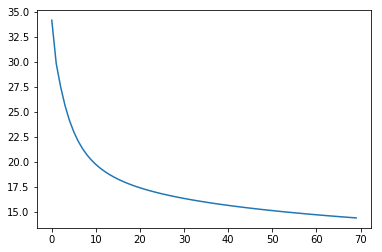

In [288]:
plt.plot(loss_values)
plt.show()